<a href="https://colab.research.google.com/github/rkp74/SVM-Implementation/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center> IIIT Vadodara </center>
## <center> Winter 2022-23 </center>
## <center> CS/IT 308 Machine Learning Lab</center>
## <center> Lab#6 Support vector machine (SVM)</center>

**Problem 1)** Classify the given data using linear SVM algorithm.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm

In [ ]:
# linear data
X = np.array([1, 5, 1.5, 8, 1, 9, 7, 8.7, 2.3, 5.5, 7.7, 6.1])
y = np.array([2, 8, 1.8, 8, 0.6, 11, 10, 9.4, 4, 3, 8.8, 7.5])

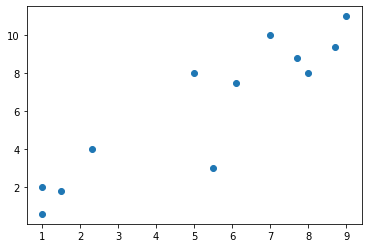

In [ ]:
# show unclassified data
plt.scatter(X, y)
plt.show()

In [ ]:
# shaping data for training the model
training_X = np.vstack((X, y)).T
training_y = [0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1]

In [ ]:
# define the model
from sklearn.svm import SVC

# create an SVM object with linear kernel
svm_model = SVC(kernel='linear', random_state = 0, C=1.0)


In [ ]:
# train the model
# train the SVM model on the training data
svm_model.fit(training_X, training_y)


SVC(kernel='linear', random_state=0)

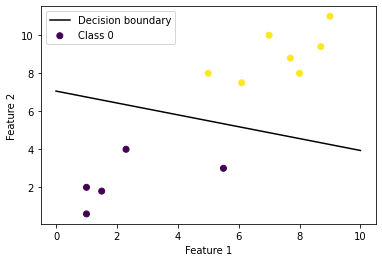

In [ ]:
# get the weight values for the linear equation from the trained SVM model
w = svm_model.coef_[0]

# get the y-offset for the linear equation
b = svm_model.intercept_

# make the x-axis space for the data points
x_min, x_max = training_X[:, 0].min() - 1, training_X[:, 0].max() + 1
xx = np.linspace(x_min, x_max, 10)

# get the y-values to plot the decision boundary
yy = (-w[0] * xx - b) / w[1]

# plot the decision boundary
plt.plot(xx, yy, 'k-')

# plot the data points with different colors for each class
plt.scatter(training_X[:, 0], training_X[:, 1], c=training_y)

# add labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(['Decision boundary', 'Class 0', 'Class 1'])

# show the plot visually
plt.show()


**Problem 2)** Load the data. The data description can be found in below link.

https://archive.ics.uci.edu/ml/datasets/banknote+authentication

<br>

Split the data to train and test set. More information can be found here.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

<br>

Write a code for linear SVM model. Examples can be found here.

https://github.com/soloice/SVM-python

https://gist.github.com/mblondel/586753/f740949d0336484567dd422fe53445ac8821f5b2

<br>

Learn and test the model for different hyperparameters and check the accuracy.


In [ ]:
#Write your code here.
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


df = pd.read_csv('data_banknote_authentication.txt', sep="\t", header=None)

classes = 2
X,t= make_classification( n_classes = classes, random_state= 40)

X_train, X_test, y_train, y_test=  train_test_split(X, t , test_size=0.50)

model = svm.SVC(kernel = 'linear', random_state = 0, C=1.0)
#model without parameter tuning
model.fit(X_train,y_train)
y=model.predict(X_test)
y2=model.predict(X_train)
#%%
from sklearn.metrics import accuracy_score
score =accuracy_score(y, y_test)
print("Accuracy on test data=",score,"\n")

#%%


from sklearn.model_selection import GridSearchCV
  
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(X_train, y_train)

# print best parameter after tuning
print("\n best parameter after tuning = ",grid.best_params_,"\n")
  
# print how our model looks after hyper-parameter tuning
print("The model looks like this after hypertuning = ",grid.best_estimator_)

grid_predictions = grid.predict(X_test)
score2 =accuracy_score(grid_predictions, y_test)
print("Accuracy on test data after hyper-tuning =",score2,"\n")


Accuracy on test data= 0.92 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.400 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.500 total time=   0.0s
[CV 2/5] END ....

**Problem 3)** Classify the given data using non-linear SVM.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import svm

In [ ]:
# non-linear data
circle_X, circle_y = datasets.make_circles(n_samples=300, noise=0.05)

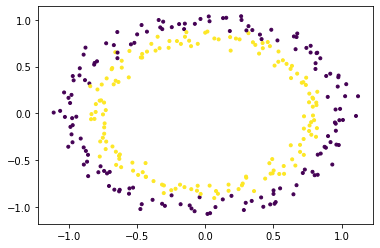

In [ ]:
# show raw non-linear data
plt.scatter(circle_X[:, 0], circle_X[:, 1], c=circle_y, marker='.')
plt.show()

In [ ]:
# make non-linear algorithm for model
model2 = svm.SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# training non-linear model
model2.fit(circle_X,circle_y)

SVC()

In [ ]:
from sklearn.metrics import classification_report
from matplotlib import style
# Plot the decision boundary for a non-linear SVM problem
def plot_decision_boundary(model, ax=None):
    if ax is None:
        ax = plt.gca()
        
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
# create a grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)

	# shape data
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    
	# get the decision boundary based on the model
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary
    ax.contour(X, Y, P,
               levels=[0], alpha=0.5,
               linestyles=['-'])
    

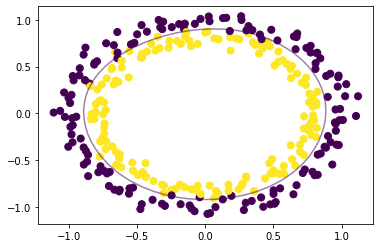

In [ ]:
# plot data and decision boundary
plt.scatter(circle_X[:, 0], circle_X[:, 1], c=circle_y, s=50)
plot_decision_boundary(model2)
plt.scatter(model2.support_vectors_[:, 0], model2.support_vectors_[:, 1], s=50, lw=1, facecolors='none')
plt.show()    